In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
customers = pd.read_csv("Downloads/Customers.csv")
products = pd.read_csv("Downloads/Products.csv")
transactions = pd.read_csv("Downloads/Transactions.csv")

In [3]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [6]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [7]:
print(data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [8]:
print(data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [9]:
top_categories = data['Category'].value_counts().head(5)
print(top_categories)

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [10]:
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


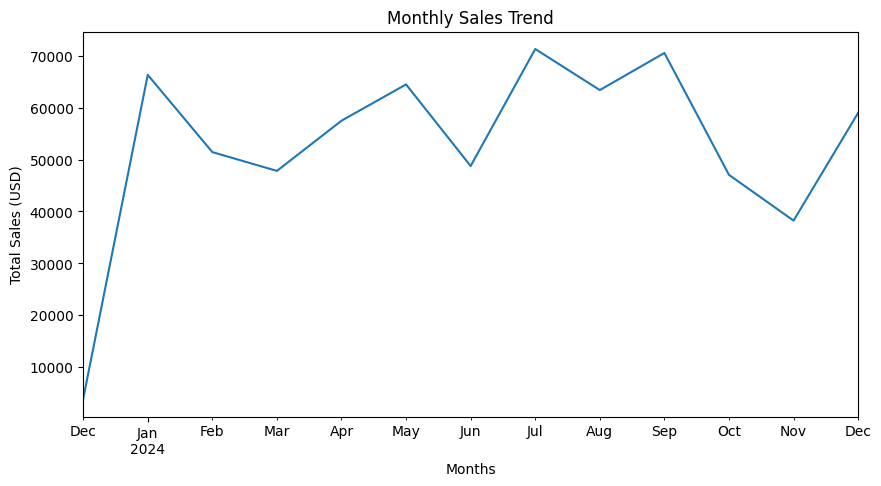

In [13]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
time_series = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
time_series.plot(kind='line', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Sales (USD)')
plt.show()